<a href="https://colab.research.google.com/github/shubhs777c/diwali-sales-data-EDA-/blob/main/Diwali_sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [609]:
# Importing Necessary Library.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [610]:
# Mounting google drive.

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [611]:
# Reading the CSV (comma seperated value) file by using pandas operation.

df= pd.read_csv('/content/drive/MyDrive/project csv files/diwali sales/Diwali Sales Data.csv', encoding= 'unicode_escape')
     

In [612]:
# Mentioned the shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 11251 rows and 15 columns.


In [613]:
# Illustrate the Information of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [614]:
# Columns present in dataset.
list(df.columns)

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount',
 'Status',
 'unnamed1']

In [615]:
# Finding out duplicated data from the dataset.

df.duplicated().value_counts()

False    11243
True         8
dtype: int64

In [616]:
# Dropped the duplicates value from data.

df=df.drop_duplicates()
df.shape

(11243, 15)

In [617]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


In [618]:
df.sample(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
9404,1004408,Harsh,P00117142,M,46-50,48,0,Uttar Pradesh,Central,Hospitality,Electronics & Gadgets,1,4150.0,NaN,NaN
3708,1002592,Nikita,P00180342,F,51-55,52,1,Uttar Pradesh,Central,Hospitality,Food,2,11481.0,NaN,NaN
3826,1004882,Jill,P00321742,F,46-50,48,1,Maharashtra,Western,Chemical,Food,4,11372.0,NaN,NaN


In [619]:
# Drop the column names status and unnamed.

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [620]:
df.shape

(11243, 13)

In [621]:
# finding out null value count.

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [622]:
# Columns which present null values.

df.isna().sum().sort_values(ascending=False)[:1].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,Amount,12


In [623]:
df.dropna(inplace=True)

In [624]:
df.shape

(11231, 13)

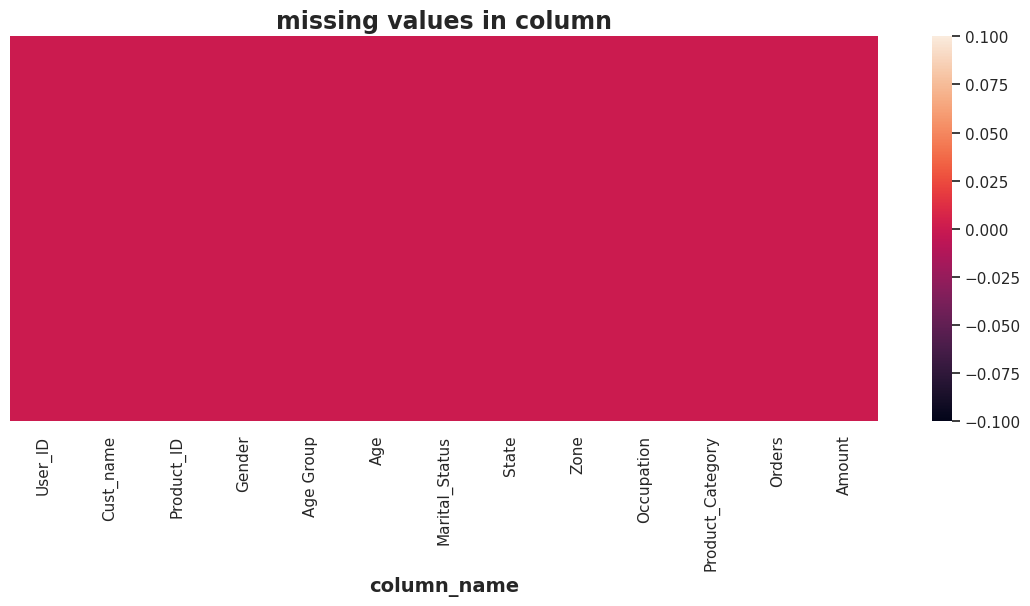

In [625]:
# Finding out correaltion between variables.

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [626]:
# change the datatype.

df['Amount']=df['Amount'].astype('int')

In [627]:
df['Amount'].dtype

dtype('int64')

In [628]:
# List of columns present in dataset. 

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [629]:
# Rename the columns in dataset.

df.rename(columns={"Cust_name":"customer_name",'Marital_Status':'Shaadi',},inplace=True)

In [630]:
# Description of dataset.

df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [631]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [632]:
df['User_ID'].nunique()

3752

In [633]:
df['Shaadi'].value_counts()

0    6514
1    4717
Name: Shaadi, dtype: int64

# **Value counts of  variables.**

In [634]:
# Seperating categorical and numerical columns from overall dataframe.

categorical_column=[]
numerical_column=[]
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_column.append(col)
    else:
        numerical_column.append(col)
print("Categorical column: ", categorical_column)
print("Numerical column: ", numerical_column)

Categorical column:  ['customer_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category']
Numerical column:  ['User_ID', 'Age', 'Shaadi', 'Orders', 'Amount']


In [635]:
# value_counts of categorical variables.

print(categorical_column)
for column in categorical_column :
    print(df[column].value_counts(),'\n')

['customer_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category']
Vishakha       42
Shreyshi       32
Sudevi         30
Akshat         29
Alejandro      28
               ..
Madhav          2
Sarita          2
Madan Mohan     2
Laal            1
Bindu           1
Name: customer_name, Length: 1250, dtype: int64 

P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
             ..
P00257642     1
P00078242     1
P00333542     1
P00206642     1
P00296942     1
Name: Product_ID, Length: 2350, dtype: int64 

F    7828
M    3403
Name: Gender, dtype: int64 

26-35    4536
36-45    2282
18-25    1878
46-50     983
51-55     829
55+       427
0-17      296
Name: Age Group, dtype: int64 

Uttar Pradesh       1942
Maharashtra         1522
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar              

In [636]:
# check the first row data .
df.iloc[0]

User_ID                 1002903
customer_name         Sanskriti
Product_ID            P00125942
Gender                        F
Age Group                 26-35
Age                          28
Shaadi                        0
State               Maharashtra
Zone                    Western
Occupation           Healthcare
Product_Category           Auto
Orders                        1
Amount                    23952
Name: 0, dtype: object

In [637]:
# check the selecting columnwise data .

df.iloc[:,[0,1,2,3]]

,User_ID,customer_name,Product_ID,Gender
0,1002903,Sanskriti,P00125942,F
1,1000732,Kartik,P00110942,F
2,1001990,Bindu,P00118542,F
3,1001425,Sudevi,P00237842,M
4,1000588,Joni,P00057942,M
...,...,...,...,...
11246,1000695,Manning,P00296942,M
11247,1004089,Reichenbach,P00171342,M
11248,1001209,Oshin,P00201342,F
11249,1004023,Noonan,P00059442,M


# **Exploratory Data Analysis**

<Axes: ylabel='Zone'>

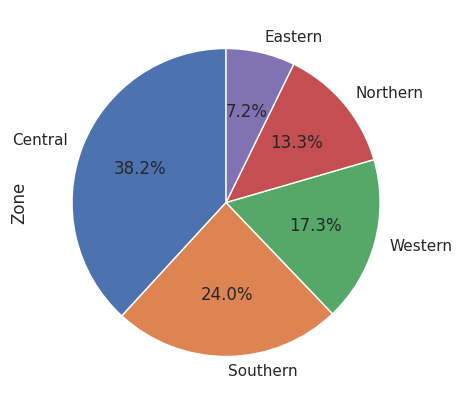

In [638]:
# Distribution of zones by using Pie Chart.

df['Zone'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,counterclock=True)

The above pie chart shows that most of the sales are generated from central region ,so shop owner has to give Fruitful benefits for that Region to cultivate larger amount of profits .

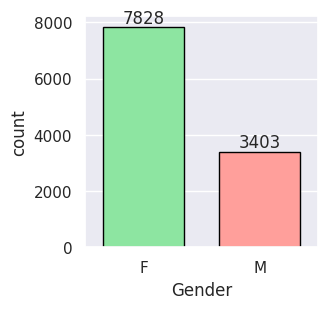

In [639]:
# plotted the Counts of customers on Gender variable.

plt.figure(figsize=(3,3))
counts=sns.countplot(x='Gender',data=df ,color='green',saturation=1.0 , width=0.7, linewidth=1 ,edgecolor="black" ,dodge=True ,palette=["#8de5a1", "#ff9f9b"])
for bars in counts.containers:
    counts.bar_label(bars)
plt.show()

Above count plots shows that Female customers are generating more revenue than male customer.owner should be more focus on  male Customer Acquisition along with female customers to increase the growth in revenue . 

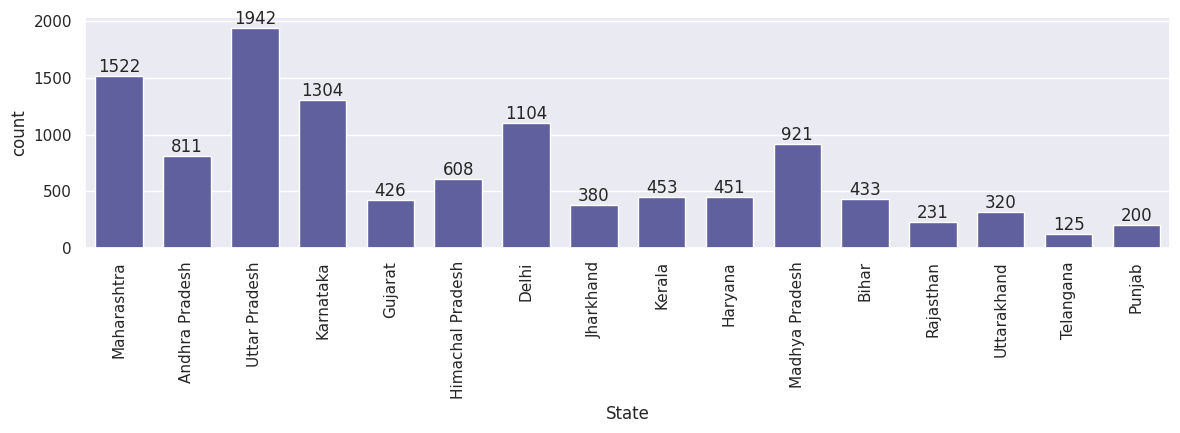

In [640]:
# Plotted the Bar Graph considering State Variable and finding out its count.

plt.figure(figsize=(14,3))
statewise_count=sns.countplot(x='State', data=df, color='blue',saturation=0.25,width=0.7,linewidth=1,edgecolor="white")
for bars in statewise_count.containers:
    statewise_count.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

This graph shows us statswise customer visited to shop.

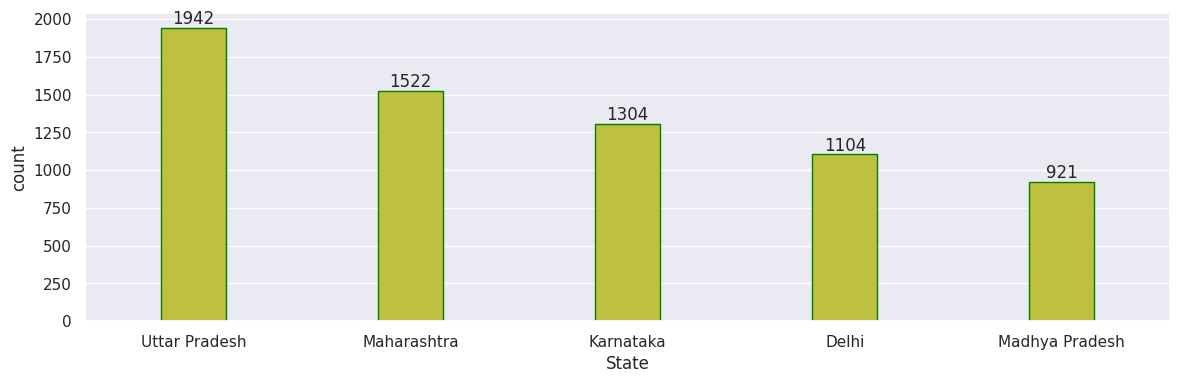

In [641]:
# Constructed top 5 state counts of sales.

plt.figure(figsize=(14,4))
top_5=sns.countplot(x='State', data=df, order=df['State'].value_counts().iloc[:5].index,color='yellow',width=0.3,edgecolor="green",saturation=0.50)
for bars in top_5.containers:
    top_5.bar_label(bars)
plt.show()

Above Bar charts shows that Uttarpradesh ,Maharashtra,Delhi,Karnataka,Madhyapradesh are the states where more customer acquisition is alloted to growth of the shop.

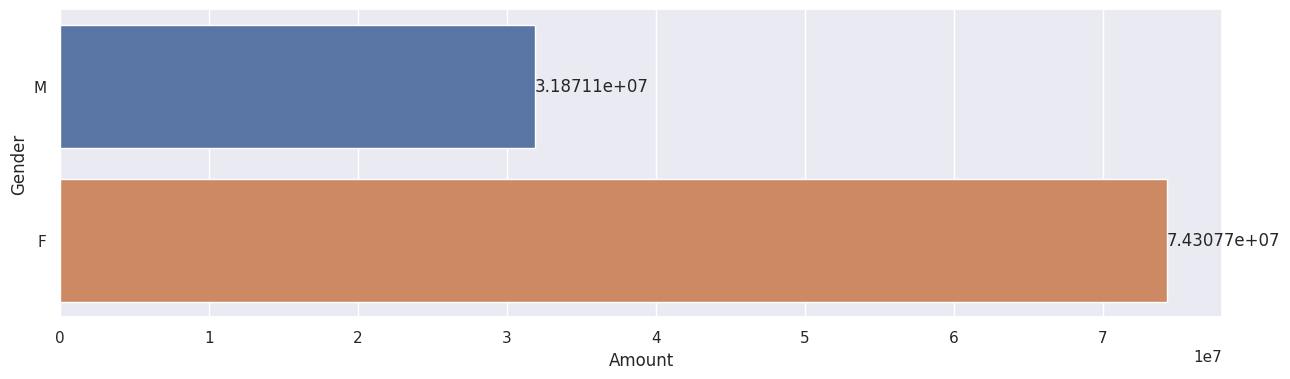

In [642]:
# Plotted bar graph on Considering Gender

plt.figure(figsize=(15,4))
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=True)

Gender_count=sns.barplot(x ='Amount',y= 'Gender' ,data = sales_gen)
for bars in Gender_count.containers:
    Gender_count.bar_label(bars)

<Axes: ylabel='Amount'>

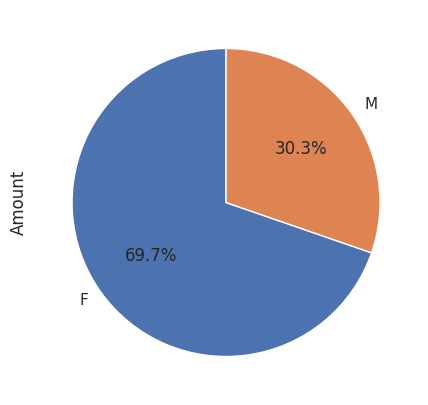

In [643]:
# Percentage distribution of customers who visited the shop.

grouped = df.groupby('Gender')['Amount'].count()
grouped.plot(kind='pie',autopct='%1.1f%%',startangle=90,counterclock=True)

The above pie chart shows more weightage is on female customers.

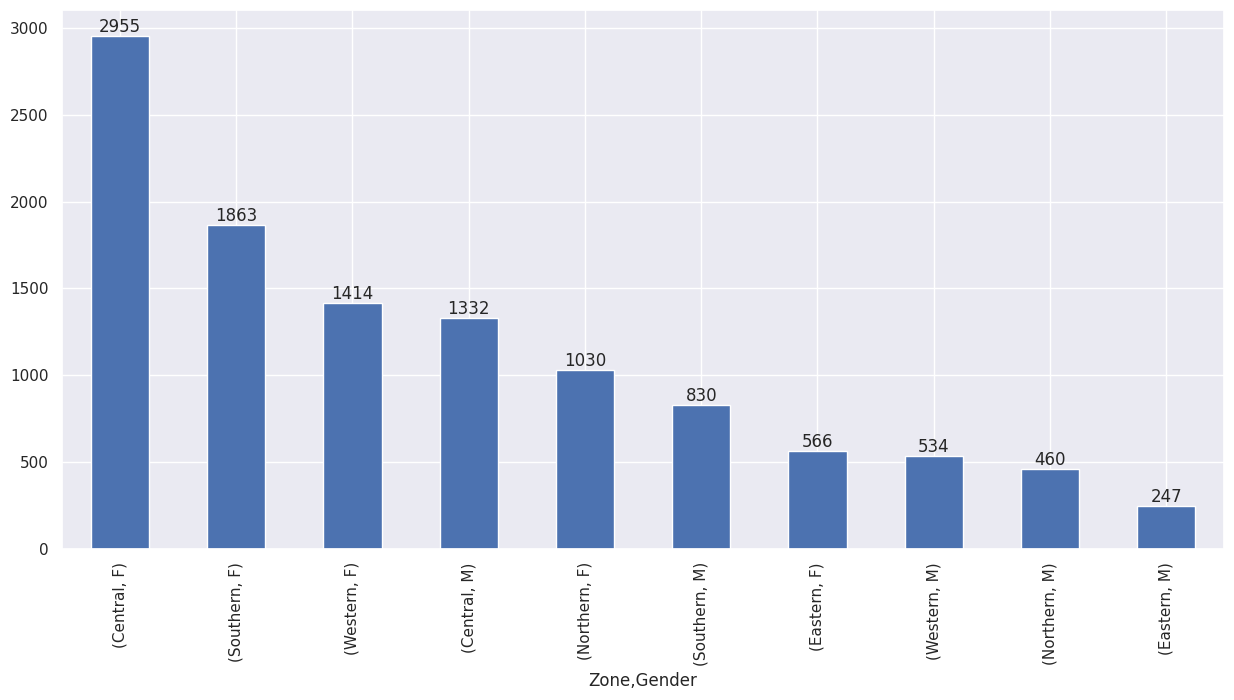

In [644]:
# Distribution of zones with respect to customer gender.

plt.figure(figsize=(15,7))
grouped = df.groupby(['Zone','Gender'])['Amount'].count().sort_values(ascending=False)
countwise=grouped.plot(kind='bar')
for bars in countwise.containers:
    countwise.bar_label(bars)

The above graph shows top 3 zones which is central,southern,western is belongs to female customers who contribute more to the growth of sales .

<Axes: ylabel='State,Zone'>

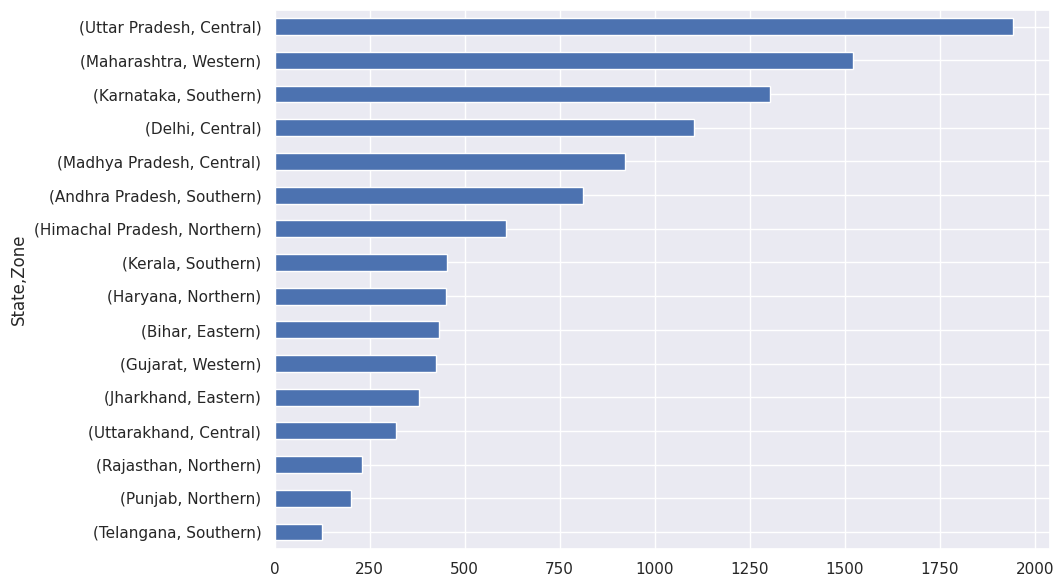

In [645]:
# State and zonewise amount collection 

plt.figure(figsize=(10,7))
grouped = df.groupby(['State','Zone'])['Amount'].count().sort_values(ascending=True)
grouped.plot(kind='barh')

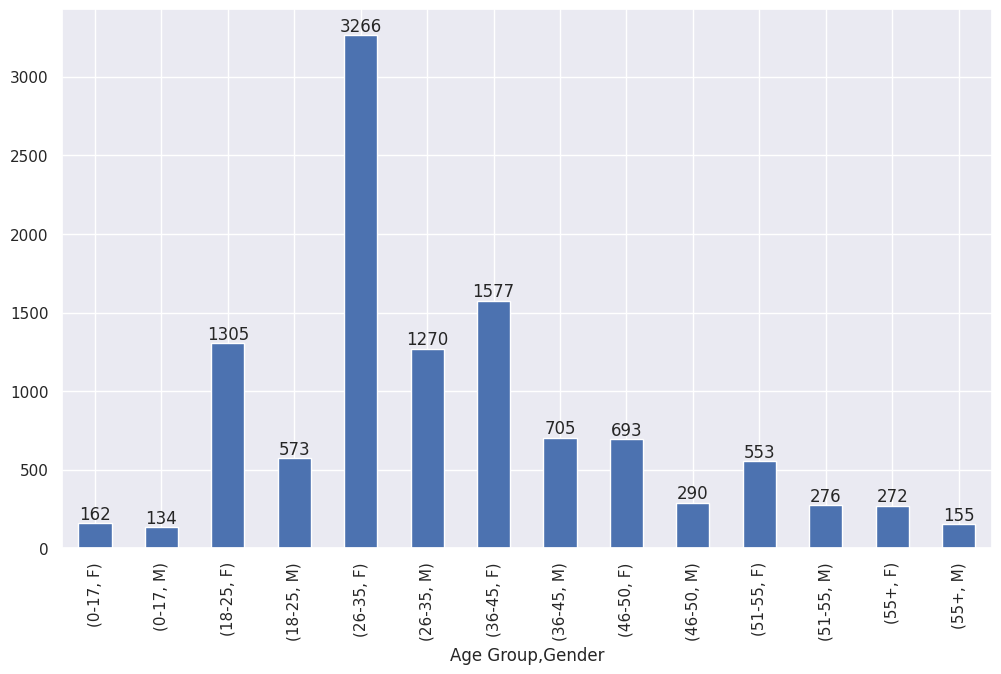

In [646]:
# Age group wise Distribution of customers.

plt.figure(figsize=(12,7))
grouped = df.groupby(['Age Group','Gender'])['Amount'].count().sort_index()
count_number=grouped.plot(kind='bar')
for i, count in enumerate(grouped.values):
    count_number.text(i, count, str(count), ha='center', va='bottom')

The above grpah shows that age group between 26-35 female customers generate Highest amount.

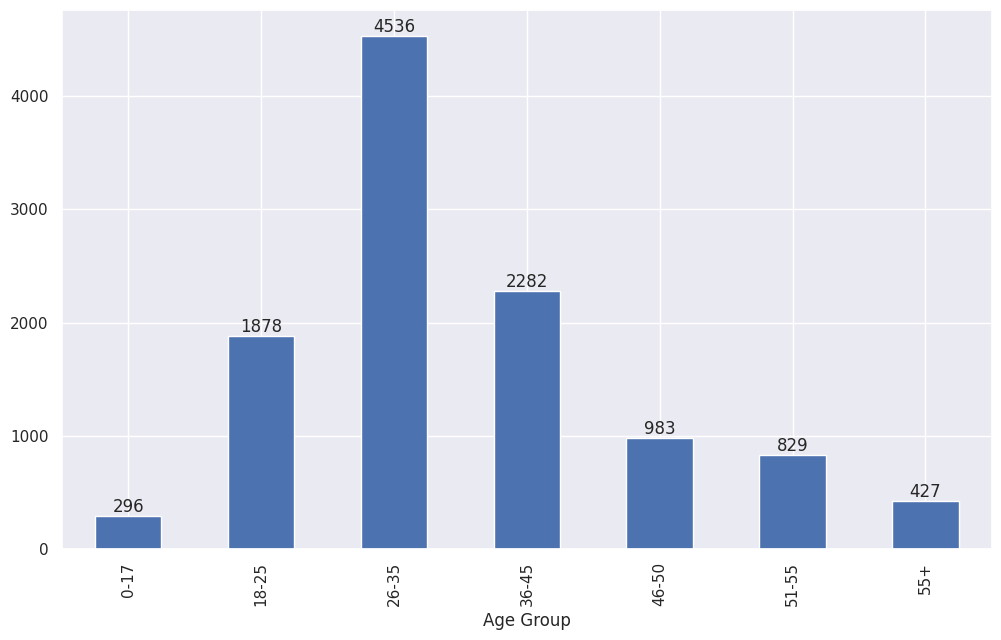

In [647]:
# overall age group wise distribution.

plt.figure(figsize=(12,7))
grouped = df.groupby(['Age Group'])['Amount'].count().sort_index()
count_number=grouped.plot(kind='bar')
for i, count in enumerate(grouped.values):
    count_number.text(i, count, str(count), ha='center', va='bottom')

The customers whose age  group between 26-35 are placed more orders than any other age group and generating more revenue.


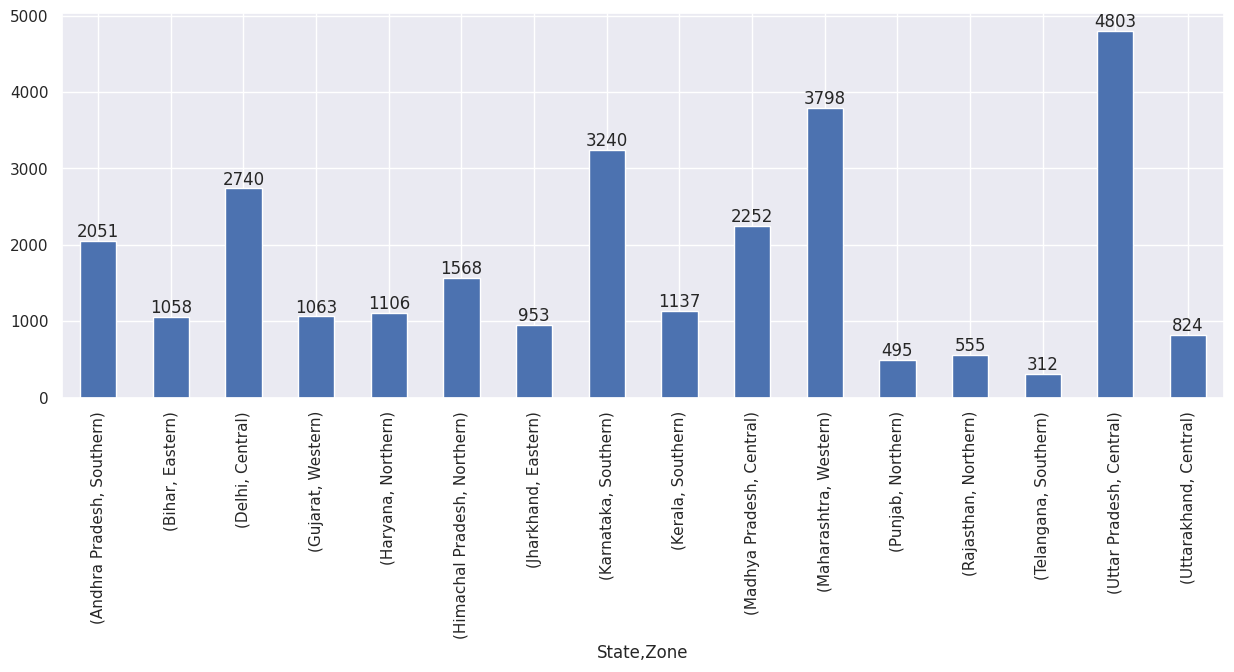

In [648]:
# state and zonewise customer visited to shop.

grouped = df.groupby(['State','Zone'])['Orders'].sum().sort_index(ascending=True)
countwise=grouped.plot(kind='bar')
for bars in countwise.containers:
    countwise.bar_label(bars)

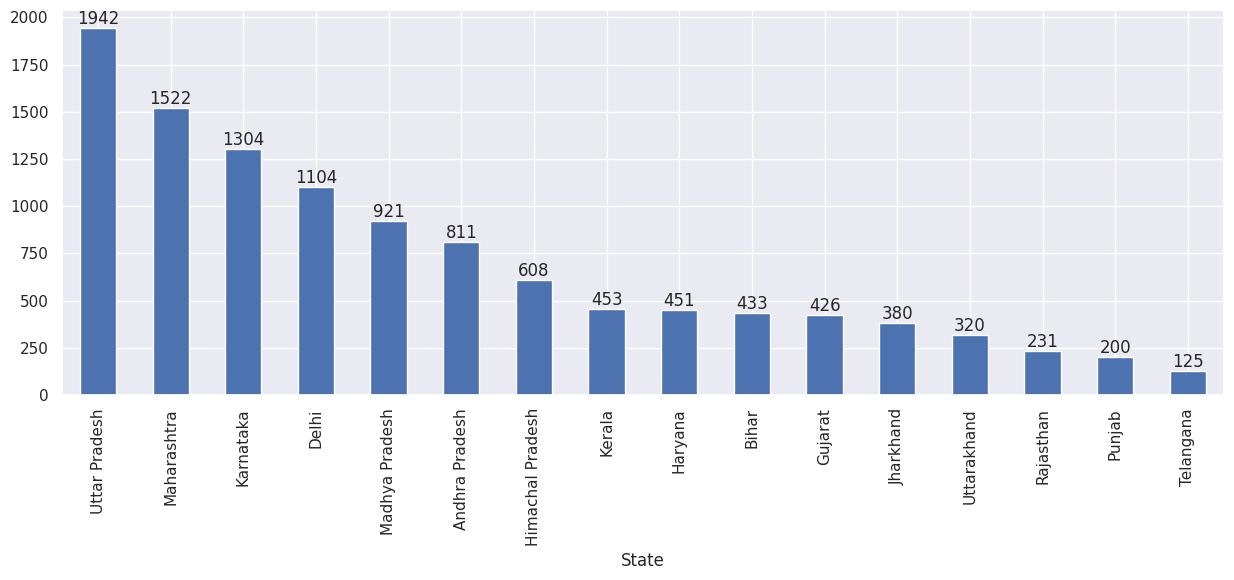

In [649]:
# statewise customer allocations.

grouped = df.groupby(['State'])['Amount'].count().sort_values(ascending=False)
countwise=grouped.plot(kind='bar')
for bars in countwise.containers:
    countwise.bar_label(bars)

The Uttarpradesh state have Highest customers acquisation along with maharashtra and karanataka which is in 2nd and 3rs place.

<Axes: ylabel='Shaadi'>

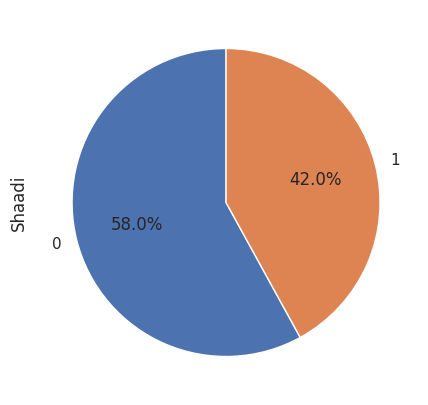

In [650]:
# Distribution of zones by using Pie Chart.

df['Shaadi'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,counterclock=True)

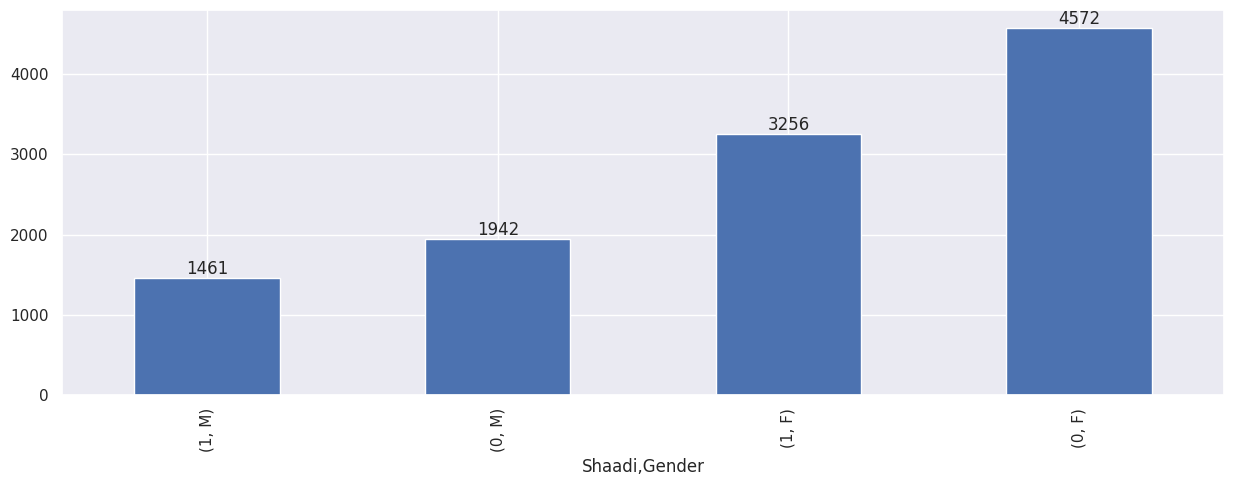

In [651]:
# Distribution of customer along with their marital status.

grouped = df.groupby(['Shaadi','Gender'])['Amount'].count().sort_values(ascending=True)
countwise=grouped.plot(kind='bar')
for bars in countwise.containers:
    countwise.bar_label(bars)

The above graph shows customers count along with their marital status

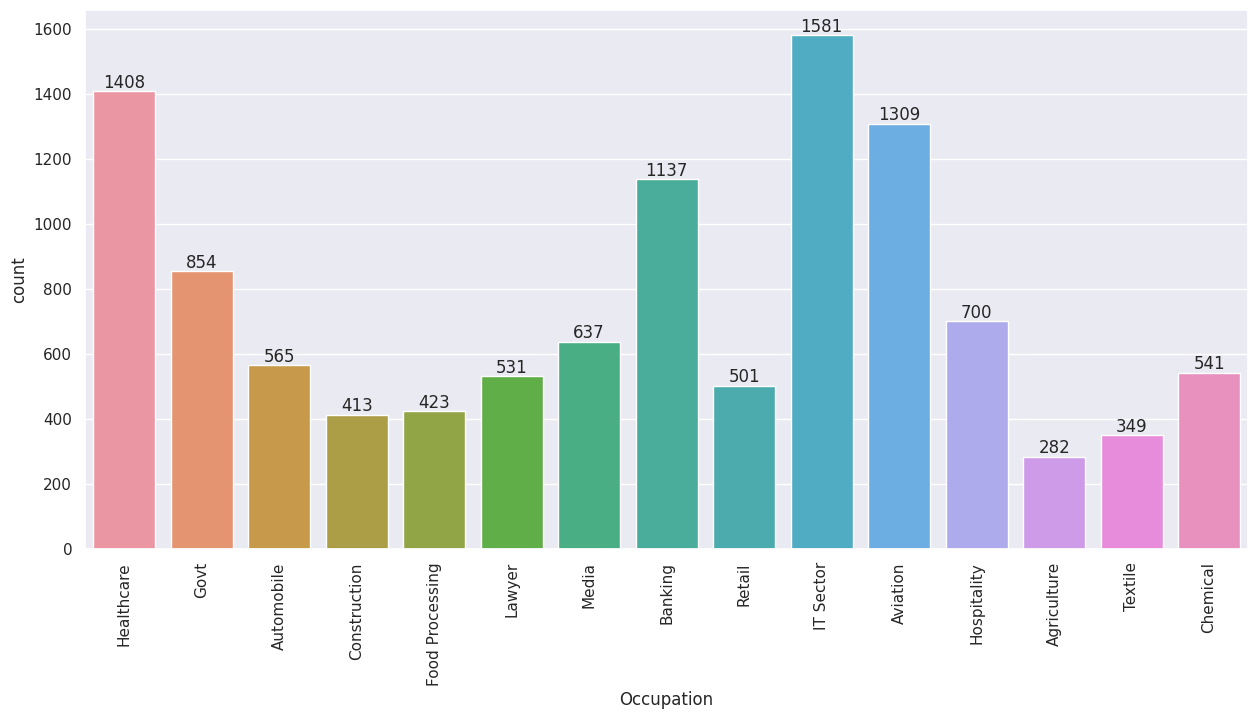

In [652]:
# Occupation wise customer allocation.

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
occupationwise_count= sns.countplot(x='Occupation',data=df)
for bars in occupationwise_count.containers:
    occupationwise_count.bar_label(bars)


This graph shows Healthcare and IT sector Employees contribute more to enhance the sales of shop.

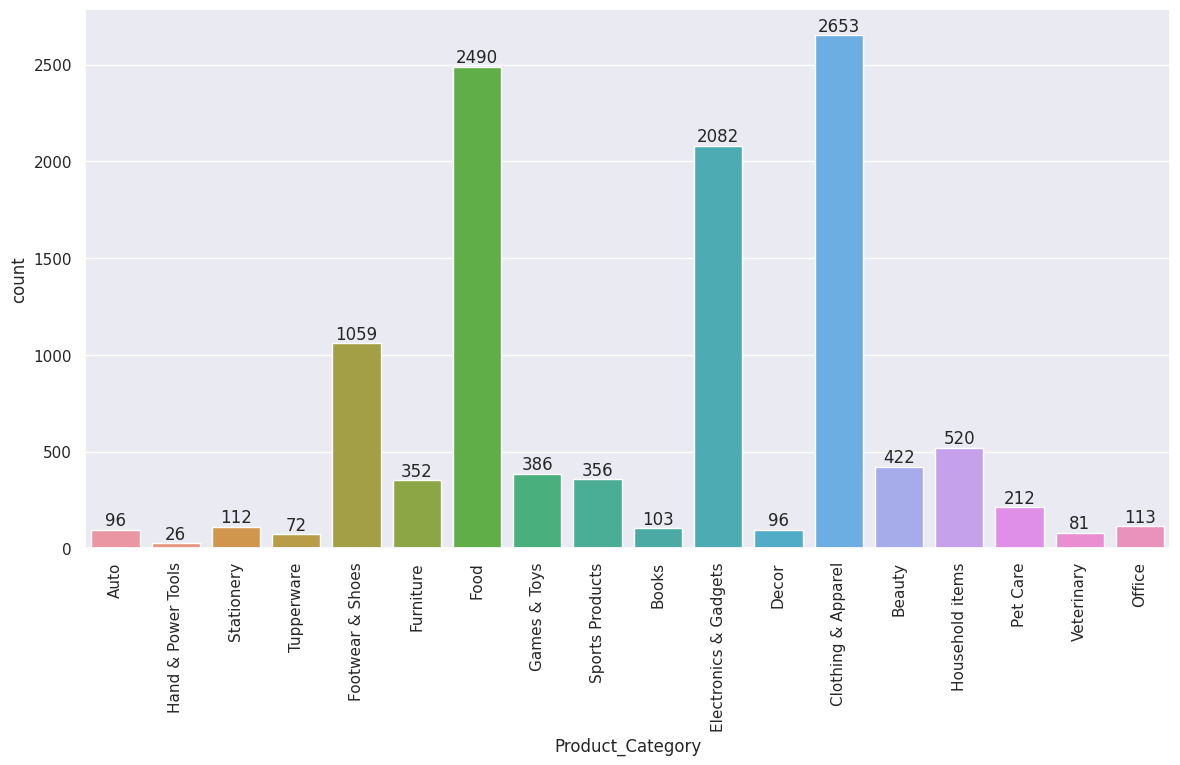

In [653]:
# Distribution of customers along with product category.

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
counts=sns.countplot(data=df,x="Product_Category")
for bars in counts.containers:
    counts.bar_label(bars)


From the above chart its shows that clothing and apparel product category more people are responsive to contribute the growth of sales

<Axes: xlabel='customer_name'>

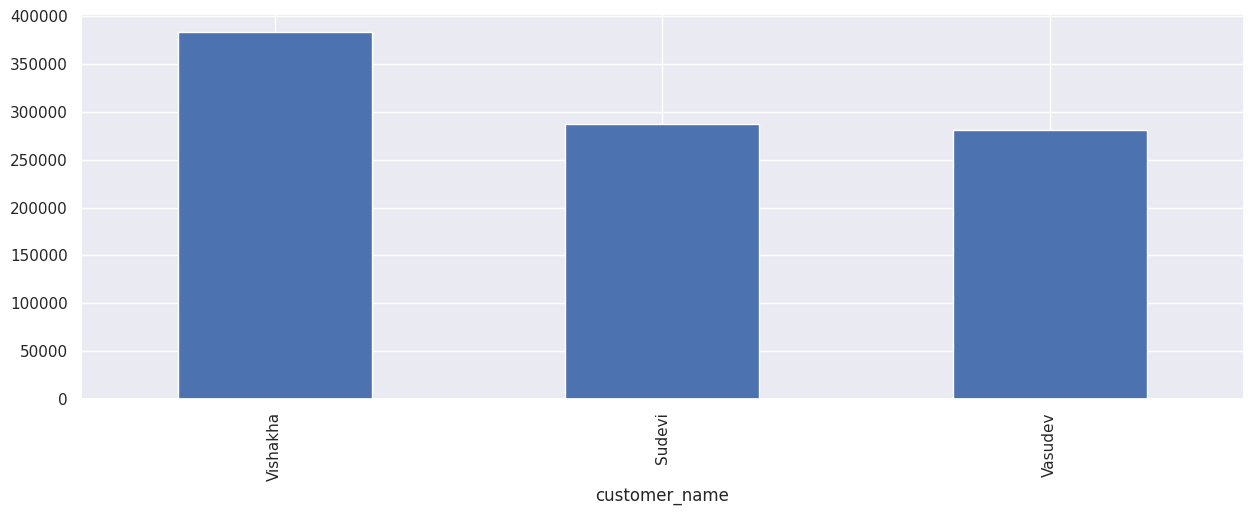

In [654]:
# Top 3 customers who contribute more to the sales .
grouped=df.groupby('customer_name')['Amount'].sum()
sorted_grouped=grouped.sort_values(ascending=False)
top_customers=sorted_grouped.head(3)
top_customers.plot(kind="bar")


In [655]:
# Top male and female customer who contributed to increase the sales .

grouped = df.groupby(['Gender','customer_name','Age Group'])['Amount'].sum().sort_values(ascending=False).head(2)
grouped

Gender  customer_name  Age Group
F       Vishakha       26-35        382782
M       Vasudev        26-35        281034
Name: Amount, dtype: int64

In [656]:
# Top customer from each state.

max_amounts = df.groupby('State').apply(lambda x: x.loc[x['Amount'].idxmax()])
print(max_amounts[['customer_name', 'Amount','Gender']])

                 customer_name  Amount Gender
State                                        
Andhra Pradesh          Kartik   23934      F
Bihar                    Hazel   20860      F
Delhi                 Harshita   23770      M
Gujarat                   Joni   23877      M
Haryana                Shivani   21563      M
Himachal Pradesh          Joni   23877      M
Jharkhand           Inderpreet   23285      M
Karnataka               Sudevi   23912      M
Kerala                   Neola   23247      M
Madhya Pradesh         Bhosale   21079      F
Maharashtra          Sanskriti   23952      F
Punjab                  Aditya   19644      M
Rajasthan         Divyeshkumar   20796      M
Telangana              Maxwell   20508      M
Uttar Pradesh            Bindu   23924      F
Uttarakhand            Kalyani   20623      F


In [657]:
# Top customer name from each zone along with ist customer name and amount of sales genrated.

max_amounts = df.groupby('Zone').apply(lambda x: x.loc[x['Amount'].idxmax()])
print(max_amounts[['customer_name','Amount','Gender','Age']])

         customer_name  Amount Gender  Age
Zone                                      
Central          Bindu   23924      F   35
Eastern     Inderpreet   23285      M   27
Northern          Joni   23877      M   28
Southern        Kartik   23934      F   35
Western      Sanskriti   23952      F   28


# **Conclusion:**

1.About Zone area where central zone is increasing more contribute to the business instead of other so shop should have to focus on that zone particularly .

2.Female customers are more contribtuing to enhance the growth of sales while mens are contributing less .shop owner has to give discounts for female customers to enhance the sales .

3.Age group 26-35 is creating more revenue rather than other age group and also increased the more sales and contribute to the growth of shop.owner has to give bulky benefits for customers to enhancethe growth of shop,customer acqusition.

4.IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.